In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

from nilearn import plotting

%matplotlib inline

In [2]:
fname_mni = '../data/MNI152_T1_1mm_brain.nii.gz'
mni = nib.load(fname_mni)

In [3]:
fname_erc_L = '../data/Cho_Braak_w_erc_labels_left_gk.nii.gz'
fname_erc_R = '../data/Cho_Braak_w_erc_labels_right_gk.nii.gz'
fname_hippo_L = '../data/Cho_Braak_w_hipp_labels_left_gk.nii.gz'
fname_hippo_R = '../data/Cho_Braak_w_hipp_labels_right_gk.nii.gz'

In [4]:
erc_L = nib.load(fname_erc_L)
erc_L_dat = erc_L.get_data()
erc_R = nib.load(fname_erc_R)
erc_R_dat = erc_R.get_data()

hippo_L = nib.load(fname_hippo_L)
hippo_L_dat = hippo_L.get_data()
hippo_R = nib.load(fname_hippo_R)
hippo_R_dat = hippo_R.get_data()

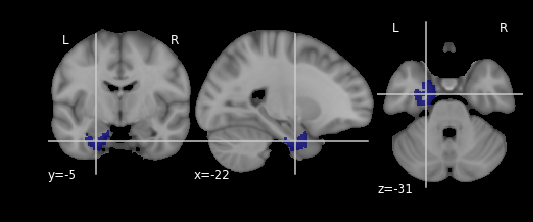

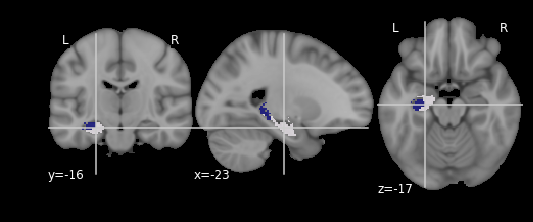

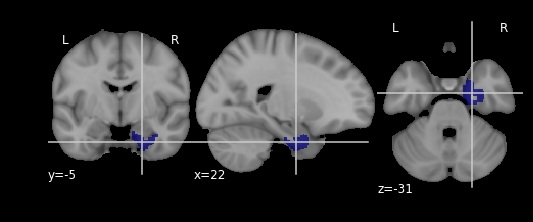

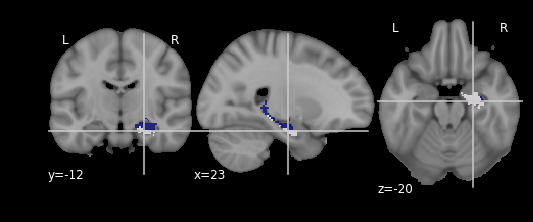

In [5]:
plotting.plot_roi(erc_L, mni)
plotting.plot_roi(hippo_L, mni)

plotting.plot_roi(erc_R, mni)
plotting.plot_roi(hippo_R, mni)

In [6]:
print("Left ERO: ", np.unique(erc_L_dat))
print("Right ERC: ", np.unique(erc_R_dat))
print("Left hippo: ", np.unique(hippo_L_dat))
print("Right hippo: ", np.unique(hippo_R_dat))

('Left ERO: ', array([ 0.,  1.], dtype=float32))
('Right ERC: ', array([ 0.,  1.], dtype=float32))
('Left hippo: ', array([ 0.,  6.,  7.], dtype=float32))
('Right hippo: ', array([ 0.,  6.,  7.], dtype=float32))


In [7]:
combined_dat = np.zeros(erc_L_dat.shape)

# Add ERC left as label 1
combined_dat += erc_L_dat

# Add hippo left as labels 2, 3
hippo_L_dat[hippo_L_dat > 0] -= 4
combined_dat += hippo_L_dat

# Add ERC right as label 4
erc_R_dat[erc_R_dat > 0] += 3
combined_dat += erc_R_dat

# Add hippo right as labels 5, 6
hippo_R_dat[hippo_R_dat > 0] -= 1
combined_dat += hippo_R_dat

In [21]:
combined_dat = np.asarray(combined_dat, dtype=int)

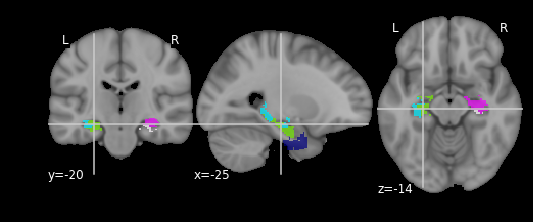

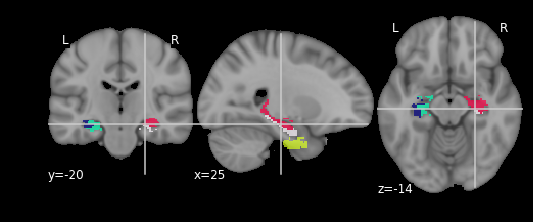

In [23]:
combined = nib.Nifti1Image(combined_dat, erc_L.affine)
plotting.plot_roi(combined, mni, cut_coords=[-25, -20, -14])
plotting.plot_roi(combined, mni, cut_coords=[ 25, -20, -14])

In [26]:
fname_combined = '../data/combined_erc_hippo_labels.nii.gz'
nib.save(combined, fname_combined)

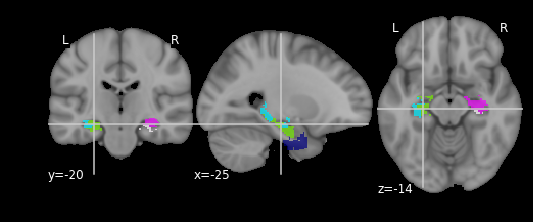

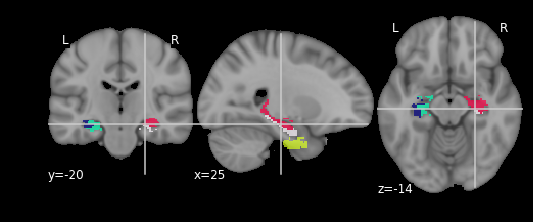

In [27]:
plotting.plot_roi(nib.load(fname_combined), mni, cut_coords=[-25, -20, -14])
plotting.plot_roi(nib.load(fname_combined), mni, cut_coords=[ 25, -20, -14])

In [28]:
np.unique(combined.get_data())

array([0, 1, 2, 3, 4, 5, 6])

New label assignments:

| Label | Region |
|:------|:-------|
| 0 | background |
| 1 | left ERC |
| 2 | left hippo 1 (formerly 6) |
| 3 | left hippo 2 (formerly 7) |
| 4 | right ERC |
| 5 | right hippo 1 (formerly 6) |
| 6 | right hippo 2 (formerly 7) |